# Re-doing the Iris analysis

## Introduction

In this notebook I will re-do the Iris data analysis using a support vector machine as classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a support vector machine.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question
Is it possible to predict the species if you only have information about the petal? Or could the information about the sepals be more important to predict the type of the iris?

## Analysis
The aim is to find out whether information about petals or sepals is more important to identify a flower for its iris species

### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()

### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [8]:
Xpetal = iris.data[:, 2:4] 
ypetal = iris.target 

Xsepal = iris.data[:,:2]
ysepal = iris.target 

### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

In [9]:
from sklearn.cross_validation import train_test_split
Xpetal_learn, Xpetal_test, ypetal_learn, ypetal_test = train_test_split(Xpetal, ypetal, train_size=0.9, random_state = 0) #Size of trainingset = 85% of whole dataset
Xsepal_learn, Xsepal_test, ysepal_learn, ysepal_test = train_test_split(Xsepal, ysepal, train_size=0.9, random_state = 0) 

/Users/Thilo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 4. fit the model using the train set, applying the support vector machine
[_describe how you are going to fit the model and what model parameters you are using_]

In [10]:
models = svm.SVC()
models.fit(Xpetal_learn, ypetal_learn);
models.fit(Xsepal_learn, ysepal_learn);

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

[1 1 2 2 2 1 2 1 1 1 1 1 1 1 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Accuracy of prediction with petal is:  0.6


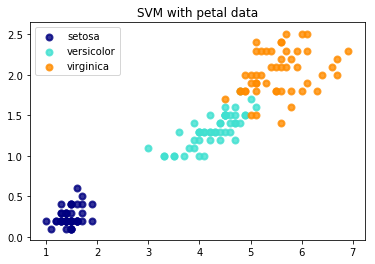

[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Accuracy of prediction with sepal is:  0.6


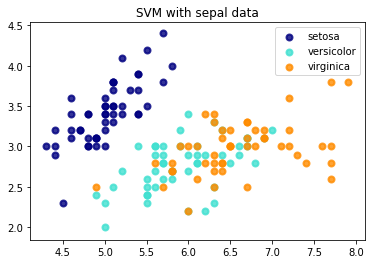

In [12]:
from sklearn.metrics import accuracy_score
resultPetal = models.predict(Xpetal_test)
print(resultPetal)
print(ypetal_test)

print("Accuracy of prediction with petal is: ", accuracy_score(ypetal_test, resultPetal))

target_names = iris.target_names
plt.figure()
plt.title("SVM with petal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xpetal[ypetal == i, 0], Xpetal[ypetal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()


resultSepal = models.predict(Xsepal_test)
print(resultSepal)
print(ysepal_test)


print("Accuracy of prediction with sepal is: ", accuracy_score(ysepal_test, resultSepal))

target_names = iris.target_names
plt.figure()
plt.title("SVM with sepal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xsepal[ysepal == i, 0], Xsepal[ysepal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

## Discussion of result
With 90% train data, the petal data achieve the highest accuracy of 60% correct answers. With 70% train data, the sepal data achieve the highest accuracy of 80% correct answers. With 60% of the correct answers as the highest accuracy, the petal data is significant enough to predict the species, but still fairly imprecise. This leads to the assumption that calyx leaf data is the better choice for predicting iris species.

Interesting is the fact that the data in the graphs do not lead to the same assumption as the accuracy. By simply evaluating the graphs, it should be easier to separate the three species with petal data, and therefore the prediction with petal data should be more accurate.